# TM10007 Group Assignment Machine Learning
#### Sara Arman, Judith Essenburg, George Franssen, Naomi Verkerk

## Google colab environment

In [30]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/naomiverkerk/TM10007.git

## Import


In [176]:
from load_data import load_data

# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets as ds
import seaborn as sns
import numpy as np
import warnings


# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

## Loading Data

In [237]:
data = load_data() 
# x_full = data.iloc[0:167, 0:724]
# y_full = data.label

In [250]:
X = data.iloc[:,0:data.shape[1]-1]
y = data.label
data_columns_name = data.columns

X.shape



(146, 704)

In [240]:
# Checken of div weggehaald is
# data = data.replace('#DIV/0!', np.nan)
data2 = data.iloc[155:158, 7:9]
data2

,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED
ID,,
TCGA-HT-7602,0.00000,2.793634
TCGA-HT-7680,0.01707,1.315581
TCGA-HT-7686,NaN,NaN


In [241]:
features = data.columns
colum_inf = data.iloc[:,:].isin([np.inf, -np.inf]).sum()
colum_inf2 = colum_inf[colum_inf>0]
sum_inf = sum(colum_inf2)
colum_loc = list(colum_inf2.index)

index_inf = data.index
if colum_loc != []:
    condition_inf = data[colum_loc[0]].isin([np.inf, -np.inf])
    ID_loc = list(index_inf[condition_inf])


    print(f'There is/are {sum_inf} infinite value(s) detected for patient ID {ID_loc} in column: {colum_loc} ')

    loc_feature =[i for i,x in enumerate(features) if x in colum_loc]
    loc_index = [i for i,x in enumerate(index_inf) if x in ID_loc ]
else:
    print(f'There are no infinite value(s)')
    
        

data.iloc[loc_index[0]:(loc_index[0]+1),loc_feature[0]:(loc_feature[0]+1)]

There is/are 1 infinite value(s) detected for patient ID ['TCGA-HT-7686'] in column: ['DIST_Vent_ED'] 


,DIST_Vent_ED
ID,
TCGA-HT-7686,inf


In [242]:
data = data.replace(np.inf, np.nan)
data.iloc[loc_index[0]:(loc_index[0]+1),loc_feature[0]:(loc_feature[0]+1)]

,DIST_Vent_ED
ID,
TCGA-HT-7686,NaN


In [243]:
features = data.columns
colum_inf = data.iloc[:,:].isin([np.inf, -np.inf]).sum()
colum_inf2 = colum_inf[colum_inf>0]
sum_inf = sum(colum_inf2)
colum_loc = list(colum_inf2.index)

index_inf = data.index
if colum_loc != []:
    condition_inf = data[colum_loc[0]].isin([np.inf, -np.inf])
    ID_loc = list(index_inf[condition_inf])


    print(f'There is/are {sum_inf} infinite value(s) detected for patient ID {ID_loc} in column: {colum_loc} ')

    loc_feature =[i for i,x in enumerate(features) if x in colum_loc]
    loc_index = [i for i,x in enumerate(index_inf) if x in ID_loc ]
else:
    print(f'There are no infinite value(s)')
    
        

data.iloc[loc_index[0]:(loc_index[0]+1),loc_feature[0]:(loc_feature[0]+1)]

There are no infinite value(s)


,DIST_Vent_ED
ID,
TCGA-HT-7686,NaN


## Describing Data

The number of samples/patients: 167. The number of columns/features: 725.
Number of GBM:  102 Number of LGG:  65


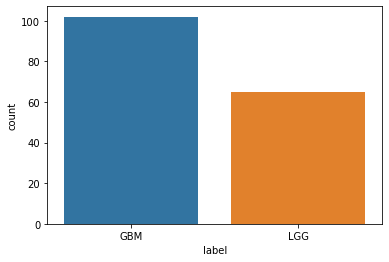

In [244]:
print(f'The number of samples/patients: {len(data.index)}. The number of columns/features: {len(data.columns)}.') #rows

ax = sns.countplot(y,label="Count")     

GBM, LGG = y.value_counts()
warnings.simplefilter(action='ignore', category=FutureWarning)

print('Number of GBM: ', GBM, 'Number of LGG: ',LGG)


## Checking/exploring the dataset

In [245]:
data.dtypes == 'object'
# Seperate numerical variables and categorical variables
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']

print(len(num_vars))
print(len(cat_vars))
print(cat_vars)



724
1
Index(['label'], dtype='object')


In [43]:
# GBM = data[data.label == 'GBM']
# LGG = data[data.label == 'LGG']

In [44]:
# # to check which features have most missing values
# missing_values = data[num_vars].isnull().sum().sort_values(ascending=False)
# missing_values_multiple = (missing_values > 0).sum()

# print(missing_values)
# print(f'The total number of features with 1 or more missing values is {missing_values_multiple}')



In [246]:
# saving missing values in a variable
a = pd.isna(data).sum()/len(data)*100

# saving column names in a variable
variables = data.columns

# new variable to store variables having missing values less than a threshold

variable = [ ]

for i in range(data.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

variable   

# creating a new dataframe using the above variables
data = data[variable]

# percentage of missing values in each variable of new data
p = pd.isna(data).sum()/len(data)*100


In [247]:
k = data.apply(lambda x: x.count(), axis=1)

# k2 = k[k<705]
# a3 = k2/data.shape[1]*100

# saving column names in a variable
variables_row = k.index

# new variable to store variables having missing values less than a threshold

variable_row = []

for i in range(variables_row.shape[0]):
    if k[i]==705: 
        variable_row.append(variables_row[i])

data = data[data.index.isin(variable_row)]

data.shape

(146, 705)

In [228]:
# p3 = p[p>0]

# print(p3.shape)

# p8 = pd.isna(data).sum()/len(data)*100
# p9 = p8[p8>0]
# p9.shape



(446,)


(467,)

In [209]:
total_upper = []
total_lower = []
len_out = 167

for i in range(0,len_out):
    Q1 = np.percentile(data[data_columns_name[i]], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[data_columns_name[i]], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    upper_list = data[data_columns_name[i]] >= (Q3+1.5*IQR)
        
    # Below Lower bound
    lower_list = data[data_columns_name[i]] <= (Q1-1.5*IQR)
    
    total_upper.append(upper_list.sum())
    total_lower.append(lower_list.sum())

    upper_list_values = data[data_columns_name[i]][upper_list]
    lower_list_values = data[data_columns_name[i]][lower_list]



In [274]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [276]:
from sklearn.preprocessing import minmax_scale
from matplotlib import cm

# scale the output between 0 and 1 for the colorbar


# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

def create_axes(title, figsize=(8, 4)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )

def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X.iloc[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X.iloc[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")    

In [277]:
distributions = []

for i in range(0,100):
    features = [data_columns_name[i], data_columns_name[i+1]]
    features_idx = [data_columns_name.get_loc(feature) for feature in features]
    X = data.iloc[:, features_idx]
    distributions.append((features, X))

In [278]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=title[0],
        x1_label=title[1],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X.iloc[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X.iloc[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=title[0],
        x1_label=title[1],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y.min(), y.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

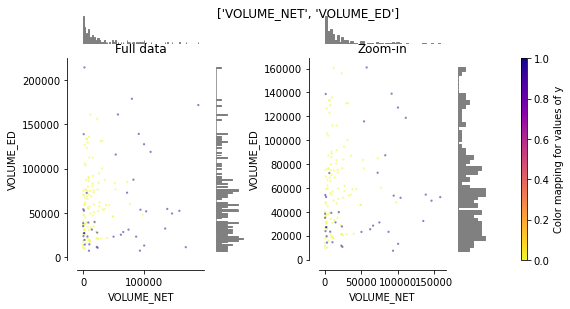

In [290]:
make_plot(1)

## Missing Data 

In [93]:
# missing_value = p[p>0]
# print(missing_value)
# index = missing_value.index
# print(index)


## Splitting

In [109]:
len_ID, len_features = data.shape 
X = data.iloc[0:len_ID, 0:len_features-1]
y = data.label

print(X.shape, type(X))
print(y.shape, type(y))

(146, 704) <class 'pandas.core.frame.DataFrame'>
(146,) <class 'pandas.core.series.Series'>


In [110]:
X2 = X.to_numpy()
y2 = y.to_numpy()
print(y2.shape, type(y2))
print(X2.shape, type(X2))

(146,) <class 'numpy.ndarray'>
(146, 704) <class 'numpy.ndarray'>


In [101]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test= train_test_split(X2, y, test_size = 0.2, random_state = 4)
# X2.shape
# print(X_train.shape, X_test.shape)

# 0.2 van 146 is ~30 
#146/30 ~5 splits

Best classifier: k=19
Best classifier: k=21
Best classifier: k=17
Best classifier: k=17
Best classifier: k=23
The optimal N=19


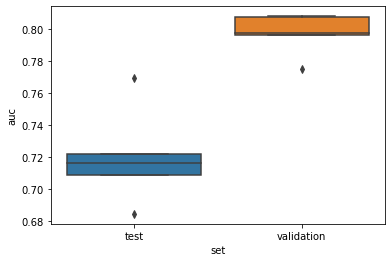

In [174]:
import warnings
# Create a 20 fold stratified CV iterator
cv_20fold = model_selection.StratifiedKFold(n_splits=5)
results = []
best_n_neighbors = []
n_components = []


# Loop over the folds
for validation_index, test_index in cv_20fold.split(X2, y2):
    # Split the data properly
    X_validation = X2[validation_index]
    y_validation = y2[validation_index]

    X_test = X2[test_index]
    y_test = y2[test_index]

    scaler = preprocessing.RobustScaler()
    scaler.fit(X_validation)
    X_train_scaled = scaler.transform(X_validation)
    X_test_scaled = scaler.transform(X_test)

    le = preprocessing.LabelEncoder()
    le.fit(y_validation)
    y_train_enc = le.transform(y_validation)
    y_test_enc = le.transform(y_test)

    pca = PCA()
    X_train_scaled_pca = pca.fit_transform(X_train_scaled)
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    from sklearn.decomposition import PCA
    pca = PCA()
    X_train_scaled_pca = pca.fit_transform(X_train_scaled)
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    result = np.where(cumsum >= 0.99)
    n_component = result[0][0]+1
    n_components.append(n_component)

    # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
    # Same as above
    parameters = {"n_neighbors": list(range(1, 26, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=5)
    grid_search = model_selection.GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(X_test)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(y_test, scores)
    results.append({
        'auc': auc,
        'k': clf.n_neighbors,
        'set': 'test'
    })
    
    # Test the classifier on the validation data
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
    
# Create results dataframe and plot it
results = pd.DataFrame(results)
seaborn.boxplot(y='auc', x='set', data=results)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")
 

   

    
    


 

## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [170]:
scaler = preprocessing.RobustScaler()
scaler.fit(X_validation)
X_train_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)


In [171]:
from sklearn import preprocessing
# Van labels naar 0 of 1
le = preprocessing.LabelEncoder()
le.fit(y_validation)
y_train_enc = le.transform(y_validation)
y_test_enc = le.transform(y_test)


## PCA

In [165]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

result = np.where(cumsum >= 0.99)
n_components = result[0][0]



1

In [163]:
result = np.where(cumsum >= 0.99)
n_components = result[0][0]

1

## Clasiffier

In [ ]:

    for k in k_list:
        clf_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        clf_knn.fit(split_X_train, split_y_train)

        # Test the classifier on the training data and plot
        score_train = clf_knn.score(split_X_train, split_y_train)
        score_test = clf_knn.score(split_X_test, split_y_test)

        train_scores.append(score_train)
        test_scores.append(score_test)
        
    all_train.append(train_scores)
    all_test.append(test_scores)
    

# Create numpy array of scores and calculate the mean and std
all_train = np.array(all_train)
all_test = np.array(all_test)

train_scores_mean = all_train.mean(axis=0)
train_scores_std = all_train.std(axis=0)

test_scores_mean = all_test.mean(axis=0)
test_scores_std = all_test.std(axis=0)

In [ ]:
parameters = {"n_neighbors": list(range(1, 12, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=5)
    grid_search = model_selection.GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)

    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(X_test)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(y_test, scores)
    results.append({
        'auc': auc,
        'k': clf.n_neighbors,
        'set': 'test'
    })
    
    # Test the classifier on the validation data
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
    
# Create results dataframe and plot it
results = pd.DataFrame(results)
seaborn.boxplot(y='auc', x='set', data=results)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")